In [6]:
import pandas as pd
pd.set_option('display.max_row', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import json

import seaborn as sns
sns.set_style('darkgrid')

In [7]:
with open('lasttry.json') as f:
    mylist =f.readlines() 

In [8]:
data = mylist[-1]

In [9]:
data1 = data.replace("'[",'')
data1 = data1.replace("]'",'')

In [10]:
df = pd.read_json(data1)

In [15]:
df.head()

,preds,time
0,[],1:39:3
1,"[{'neutral': 0.9987571835517881, 'happy': 0.00...",1:39:5
2,"[{'neutral': 0.9905983209609981, 'happy': 0.00...",1:39:7
3,"[{'neutral': 0.48943853378295904, 'happy': 0.3...",1:39:9
4,"[{'neutral': 0.7658613324165341, 'happy': 0.18...",1:39:11


In [12]:
list_of_dict = []
for j in range(len(df)):
    for i in range(len(df.loc[j].preds)):
        item = {}
        time = df.iloc[j].time
        item['time'] = time
        for key, value in df.loc[j].preds[i].items():
            item[key] = value
        list_of_dict.append(item)

wrangled_df = pd.DataFrame(list_of_dict)


In [13]:
for elem in range(len(wrangled_df.time)):
    wrangled_df.time[elem] = str(wrangled_df.time[elem]).replace('.',':')
    

/home/stanislas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
wrangled_df.head()

,angry,disgusted,fearful,happy,neutral,sad,surprised,time
0,0.000001,1.095407e-08,2.913016e-08,0.001114,0.998757,0.000057,0.000071,1:39:5
1,0.000014,1.753072e-07,1.677383e-07,0.009190,0.990598,0.000104,0.000094,1:39:7
2,0.000222,7.188392e-06,1.305788e-05,0.395645,0.489439,0.114307,0.000367,1:39:9
3,0.000083,9.403592e-06,1.439313e-04,0.183414,0.765861,0.003217,0.047272,1:39:11
4,0.000314,2.522467e-05,4.403452e-04,0.128214,0.511724,0.357072,0.002210,1:39:13


In [16]:
col = list(wrangled_df.columns)
col= col[:-1]
print(col)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [17]:
decimals = 2
for c in col:
    wrangled_df[f"{c}"] = wrangled_df[f"{c}"].apply(lambda x: round(x, decimals))
print(wrangled_df.head())

   angry  disgusted  fearful  happy  neutral   sad  surprised     time
0    0.0        0.0      0.0   0.00     1.00  0.00       0.00   1:39:5
1    0.0        0.0      0.0   0.01     0.99  0.00       0.00   1:39:7
2    0.0        0.0      0.0   0.40     0.49  0.11       0.00   1:39:9
3    0.0        0.0      0.0   0.18     0.77  0.00       0.05  1:39:11
4    0.0        0.0      0.0   0.13     0.51  0.36       0.00  1:39:13


In [19]:
wrangled_df.drop_duplicates(subset=['time'], keep='last',inplace=True)
wrangled_df.tail()

,angry,disgusted,fearful,happy,neutral,sad,surprised,time
565,0.0,0.0,0.00,0.60,0.36,0.03,0.0,1:58:49
566,0.0,0.0,0.01,0.60,0.34,0.05,0.0,1:58:51
567,0.0,0.0,0.00,0.53,0.46,0.01,0.0,1:58:53
568,0.0,0.0,0.00,0.06,0.90,0.04,0.0,1:58:55
569,0.0,0.0,0.00,0.02,0.14,0.84,0.0,1:58:57


In [21]:
wrangled_df.to_csv('fake5.csv', index = None)

In [22]:
newdf = pd.read_csv('fake5.csv')
newdf.tail()

,angry,disgusted,fearful,happy,neutral,sad,surprised,time
565,0.0,0.0,0.00,0.60,0.36,0.03,0.0,1:58:49
566,0.0,0.0,0.01,0.60,0.34,0.05,0.0,1:58:51
567,0.0,0.0,0.00,0.53,0.46,0.01,0.0,1:58:53
568,0.0,0.0,0.00,0.06,0.90,0.04,0.0,1:58:55
569,0.0,0.0,0.00,0.02,0.14,0.84,0.0,1:58:57


In [23]:
newdf.head()

,angry,disgusted,fearful,happy,neutral,sad,surprised,time
0,0.0,0.0,0.0,0.00,1.00,0.00,0.00,1:39:5
1,0.0,0.0,0.0,0.01,0.99,0.00,0.00,1:39:7
2,0.0,0.0,0.0,0.40,0.49,0.11,0.00,1:39:9
3,0.0,0.0,0.0,0.18,0.77,0.00,0.05,1:39:11
4,0.0,0.0,0.0,0.13,0.51,0.36,0.00,1:39:13


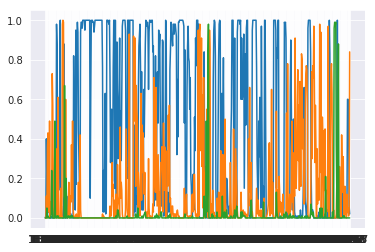

In [28]:
# plt.plot(newdf.time, newdf.angry)
# plt.plot(newdf.time, newdf.disgusted)
# plt.plot(newdf.time, newdf.fearful)
plt.plot(newdf.time, newdf.happy)
plt.plot(newdf.time, newdf.sad)
plt.plot(newdf.time, newdf.surprised)
plt.show()